In [6]:
import finesse
import numpy as np
import matplotlib.pyplot as plt

finesse.configure(plotting=True)
prmi=finesse.Model()
prmi.parse("""
#Laser
l laser P=1
s s0 laser.p1 eom1.p1 L=1

#EOMS
mod eom1 midx=0 f=9099471 order=1
s s1 eom1.p2 eom2.p1 L=1
mod eom2 midx=0.3 f=45497355 order=1
s s2 eom2.p2 Fi.p1 L=1

#Faraday isolator
dbs Fi
s s3 Fi.p3 prmar.p1 L=0

#PRM

m prmar R=0 L=4e-5 Rc=11.009
s sprmarpr prmar.p2 PRM.p1 L=0.0737 nr=1.4496 
m PRM L=8.5e-06 T=0.03
s sPRBS PRM.p2 BS.p1 L=0 #Initially set as zero

#Beam Splitter
bs BS R=0.5 L=3.75e-05 alpha=45 
s sBSAR1 BS.p3 BSAR1.p1 L=0.0687 nr=1.4496
bs BSAR1 R=5e-5 L=0 phi=-29.195
s sBSAR2 BS.p4 BSAR2.p1 L=0.0687 nr=1.4496
bs BSAR2 R=5e-5 L=0 phi=29.195


#ITMx
s michx BSAR1.p3 ITMxAR.p1 L=0 #Initially set as zero
m ITMxAR R=0 L=2e-5
s sITMxARITM ITMxAR.p2 ITMx.p1 L=0.2 nr=1.4496
m ITMx L=3.75e-05 T=0.014 Rc=-1934

#ITMy
s michy BS.p2 ITMyAR.p1 L=0 #Initially set as zero
m ITMyAR R=0 L=2e-5
s sITMyARITM ITMyAR.p2 ITMy.p1 L=0.2 nr=1.4496
m ITMy L=3.75e-05 T=0.014 Rc=-1934

pd AS_dc BS.p4.o
pd POP_dc PRM.p2.o
pd REFL_dc PRM.p1.o
pd ArmTrans_dc ITMy.p2.o

ad AS_f0 BSAR2.p3.o f=0
#ad AS_f1 BS.p4.o f=9099471
ad AS_f2 BS.p4.o f=45497355
ad POP_f0 PRM.p2.o f=0
#ad POP_f1 PRM.p2.o f=9099471
ad POP_f2 PRM.p2.o f=45497355

xaxis(ITMx.phi,lin,-200,200,10000)
""")

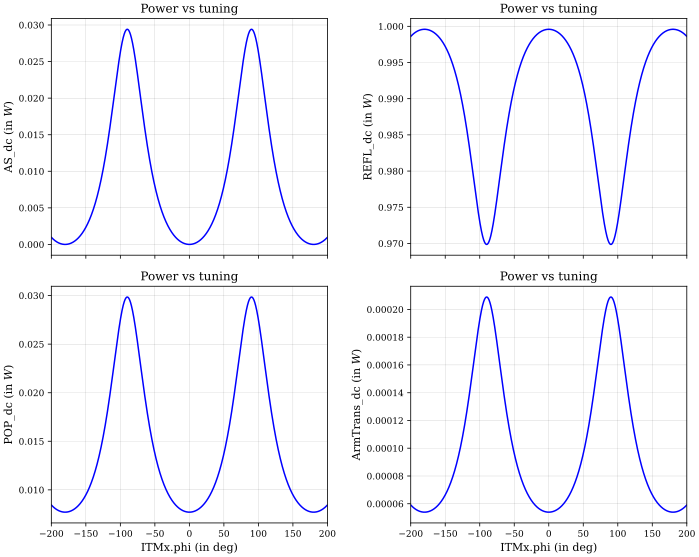

In [7]:
out=prmi.run()
### Plotting the DC readouts at AS,REFL,POP,Arm transmission ports.
AS_dc=[]
ArmTrans_dc=[]
POP_dc=[]
REFL_dc=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    AS_dc.append(out["AS_dc"][i])
    POP_dc.append(out["POP_dc"][i])
    REFL_dc.append(out["REFL_dc"][i])
    ArmTrans_dc.append(out["ArmTrans_dc"][i])
    
fig,plots=plt.subplots(2,2,figsize=(10,8),sharex=True)

plots[0,0].plot(phi,AS_dc)
plots[0,0].set_ylabel("AS_dc (in $W$)")
plots[0,0].set_title("Power vs tuning")

plots[1,0].plot(phi,POP_dc)
plots[1,0].set_ylabel("POP_dc (in $W$)")
plots[1,0].set_title("Power vs tuning")
plots[1,0].set_xlabel("ITMx.phi (in deg)") 

plots[0,1].plot(phi,REFL_dc)
plots[0,1].set_ylabel("REFL_dc (in $W$)")
plots[0,1].set_title("Power vs tuning")

plots[1,1].plot(phi,ArmTrans_dc)
plots[1,1].set_ylabel("ArmTrans_dc (in $W$)")
plots[1,1].set_title("Power vs tuning")
plots[1,1].set_xlabel("ITMx.phi (in deg)")

fig.tight_layout()    

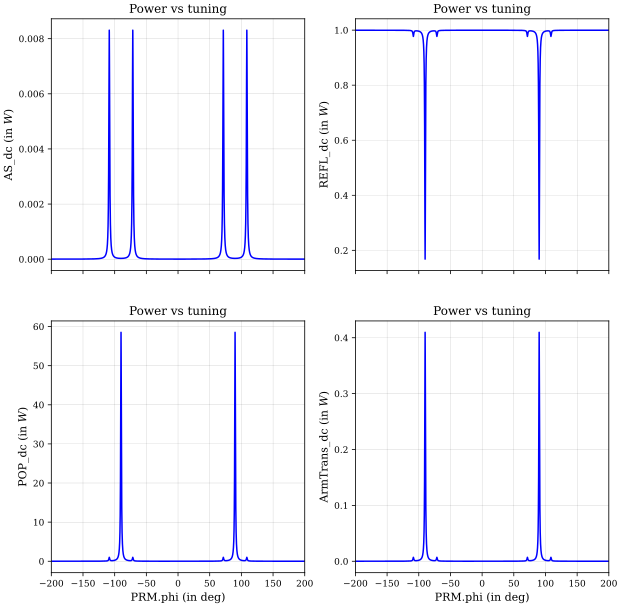

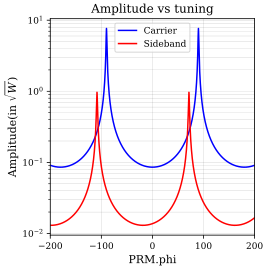

In [10]:
### Sweeping the PRM to locate the resonances of the carrier and 45M sidebands.
prmi.parse("xaxis(PRM.phi,lin,-200,200,10000)")
out=prmi.run()
AS_dc=[]
ArmTrans_dc=[]
POP_dc=[]
REFL_dc=[]
POP_f0=[]
POP_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    AS_dc.append(out["AS_dc"][i])
    POP_dc.append(out["POP_dc"][i])
    REFL_dc.append(out["REFL_dc"][i])
    ArmTrans_dc.append(out["ArmTrans_dc"][i])
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    
fig,plots=plt.subplots(2,2,figsize=(10,10),sharex=True)

plots[0,0].plot(phi,AS_dc)
plots[0,0].set_ylabel("AS_dc (in $W$)")
plots[0,0].set_title("Power vs tuning")

plots[1,0].plot(phi,POP_dc)
plots[1,0].set_ylabel("POP_dc (in $W$)")
plots[1,0].set_title("Power vs tuning")
plots[1,0].set_xlabel("PRM.phi (in deg)")

plots[0,1].plot(phi,REFL_dc)
plots[0,1].set_ylabel("REFL_dc (in $W$)")
plots[0,1].set_title("Power vs tuning")

plots[1,1].plot(phi,ArmTrans_dc)
plots[1,1].set_ylabel("ArmTrans_dc (in $W$)")
plots[1,1].set_title("Power vs tuning")
plots[1,1].set_xlabel("PRM.phi (in deg)")

fig,a=plt.subplots(1,figsize=(4,4))
a.semilogy(phi,POP_f0,label="Carrier")
a.semilogy(phi,POP_f2,label="Sideband")
a.set_xlabel("PRM.phi")
a.set_ylabel("Amplitude(in $\sqrt{W}$)")
a.set_title("Amplitude vs tuning")
a.legend(loc="best")

fig.tight_layout()

[-172.47724772    7.54075408  187.55875588]


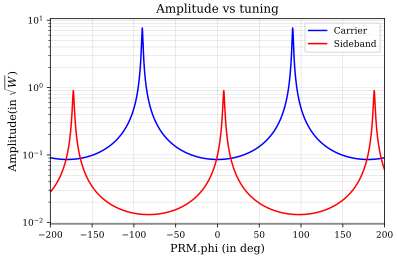

In [12]:
### Setting random PRCL parameters.
prmi.michy.L=3.99
prmi.michx.L=4.01
prmi.sPRBS.L=40
prmi.parse("xaxis(PRM.phi,lin,-200,200,10000)")
out=prmi.run()

POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))

fig.tight_layout()    
plt.semilogy(phi,POP_f0,label="Carrier")
plt.semilogy(phi,POP_f2,label="Sideband")
plt.xlabel("PRM.phi (in deg)")
plt.ylabel("Amplitude(in $\sqrt{W}$)")
plt.title("Amplitude vs tuning")
plt.legend(loc="best")
### The f2 Sideband is not resonant for this randomly set length parameters.
### We now find the tuning of PRM for which the sidebannd attains a peak amplitude.
import scipy
from scipy import signal
sb_peaks,_=signal.find_peaks(POP_f2,height=0.5)
print(phi[sb_peaks])

PR-BS length:  40.1381170780039 m


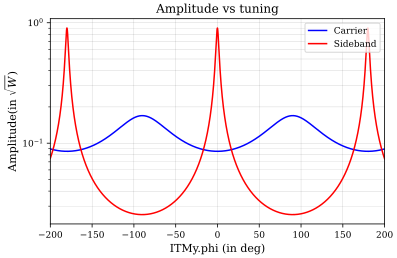

In [13]:
### Finding the length corresponding to one of the PRM.phi, which will be summed to the randomly set PR-Bs length.
### This will bring the peak of SB to the zero coordinate of PRM (Carrier is already anti-resonant)
Lambda=3E8/45497355
prmi.sPRBS.L=40+Lambda*phi[sb_peaks[1]]/360
prmi.parse("xaxis(ITMy.phi,lin,-200,200,10000)")
prmi.run()
out=prmi.run()

POP_f0=[]
POP_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
plt.semilogy(phi,POP_f0,label="Carrier")
plt.semilogy(phi,POP_f2,label="Sideband")
plt.xlabel("ITMy.phi (in deg)")
plt.ylabel("Amplitude(in $\sqrt{W}$)")
plt.title("Amplitude vs tuning")
plt.legend(loc="best")
print("PR-BS length: ",prmi.sPRBS.L)

In [14]:
### Optimizing the randomly chosen Schnupp asymmetry of 0.01 m, We will define a function, which can alter the Michx and Michy 
### lengths. We then optimize it by minimising the negative of the function output!
def f(del_l):
    prmi.michx.L=4.01+del_l
    prmi.michy.L=3.99-del_l
    out=prmi.run()
    AS_f2=[]
    for i in range(10000):
        AS_f2.append(out["AS_f2"][i])
    return abs(max(AS_f2)-min(AS_f2))
    
from scipy.optimize import minimize_scalar
res = minimize_scalar(lambda del_l: -f(del_l), bounds = [0.0, 0.20], method='bounded')
schnupp = res.x
print(f"{schnupp} m is the optimised asymmetry that allows a maximum SB transmission of {f(schnupp)}","W^0.5 to the AS port")

0.04991340112562001 m is the optimised asymmetry that allows a maximum SB transmission of 0.12189883993591245 W^0.5 to the AS port


In [15]:
print(f"Optimized MichX:{prmi.michx.L.value:.4f} m")
print(f"Optimized MichY:{prmi.michy.L.value:.4f} m")
print(f"Optimized Schnupp:{prmi.michx.L.value-4:.4f} m")
print(f"Optimized PR-BS length:{prmi.sPRBS.L.value:.4f} m")

Optimized MichX:4.0599 m
Optimized MichY:3.9401 m
Optimized Schnupp:0.0599 m
Optimized PR-BS length:40.1381 m


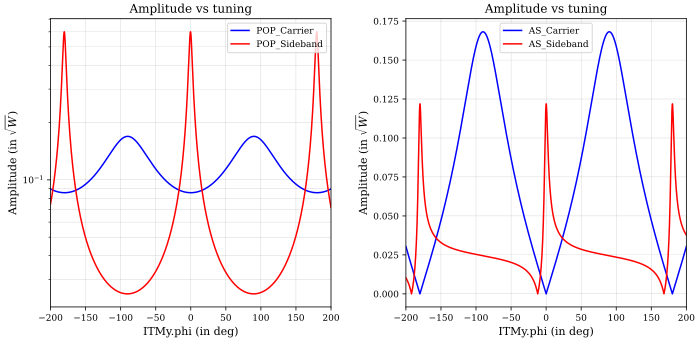

In [17]:
out=prmi.run()
POP_f0=[]
POP_f2=[]
AS_f0=[]
AS_f2=[]

phi=np.linspace(-200,200,10000)
for i in range(10000):
    POP_f0.append(abs(out["POP_f0"][i]))
    POP_f2.append(abs(out["POP_f2"][i]))
    AS_f0.append(abs(out["AS_f0"][i]))
    AS_f2.append(abs(out["AS_f2"][i]))
fig,a=plt.subplots(1,2,figsize=(10,5))
a[0].semilogy(phi,POP_f0,label="POP_Carrier")
a[0].semilogy(phi,POP_f2,label="POP_Sideband")
a[0].set_xlabel("ITMy.phi (in deg)")
a[0].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[0].set_title("Amplitude vs tuning")
a[0].legend(loc="best")

a[1].plot(phi,AS_f0,label="AS_Carrier")
a[1].plot(phi,AS_f2,label="AS_Sideband")
a[1].set_xlabel("ITMy.phi (in deg)")
a[1].set_ylabel("Amplitude (in $\sqrt{W}$)")
a[1].set_title("Amplitude vs tuning")
a[1].legend(loc="best")

fig.tight_layout()